Key Questions Analyzed
1. How many married individuals are unemployed?
2. What is the average age of individuals who subscribed to a term deposit versus those who did not?
3. How does the average balance vary across different contact months?
4. How does the average duration of customer calls vary by month?
5. What is the distribution of marital status (married/single/divorced) across different education levels?

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv(r"C:\Users\hkoli\Downloads\bank.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5.0,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1.0,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11.0,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4.0,211,3,other,no


In [4]:
df=data.copy()

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no


In [6]:
#title use for proper coloumn name 
df.columns=df.columns.str.title()
df

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5.0,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1.0,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11.0,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4.0,211,3,other,no


In [7]:
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'Poutcome', 'Y'],
      dtype='object')

In [8]:
df.rename(columns={
    "Marital":"Marital_statuts",
    'Pdays':"Day_sinces_last_contact",
    "Poutcome":"Previous_outcome",
    "Y":"Customer_subscription"
},inplace=True)
df.head(1)

,Age,Job,Marital_statuts,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_sinces_last_contact,Previous,Previous_outcome,Customer_subscription
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no


In [9]:
df.describe()

,Age,Balance,Day,Duration,Campaign,Day_sinces_last_contact,Previous
count,4521.000000,4495.000000,4521.000000,4521.000000,4442.000000,4521.000000,4521.000000
mean,41.170095,1423.153504,15.915284,263.961292,2.804818,39.766645,0.542579
std,10.576211,3015.932038,8.247667,259.856633,3.123293,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1474.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4521 non-null   int64  
 1   Job                      4521 non-null   object 
 2   Marital_statuts          4521 non-null   object 
 3   Education                4521 non-null   object 
 4   Default                  4521 non-null   object 
 5   Balance                  4495 non-null   float64
 6   Housing                  4521 non-null   object 
 7   Loan                     4521 non-null   object 
 8   Contact                  4521 non-null   object 
 9   Day                      4521 non-null   int64  
 10  Month                    4521 non-null   object 
 11  Duration                 4521 non-null   int64  
 12  Campaign                 4442 non-null   float64
 13  Day_sinces_last_contact  4521 non-null   int64  
 14  Previous                

In [11]:
df.dtypes

Age                          int64
Job                         object
Marital_statuts             object
Education                   object
Default                     object
Balance                    float64
Housing                     object
Loan                        object
Contact                     object
Day                          int64
Month                       object
Duration                     int64
Campaign                   float64
Day_sinces_last_contact      int64
Previous                     int64
Previous_outcome            object
Customer_subscription       object
dtype: object

## DATA CLEANING

In [13]:
df["Job"]=df["Job"].astype("category")
df["Marital_statuts"]=df["Marital_statuts"].astype("category")
df["Education"]=df["Education"].astype("category")
df["Default"]=df["Default"].astype("category")
df["Housing"]=df["Housing"].astype("category")
df["Loan"]=df["Loan"].astype("category")
df["Contact"]=df["Contact"].astype("category")
df["Month"]=df["Month"].astype("category")
df["Previous_outcome"]=df["Previous_outcome"].astype("category")
df["Customer_subscription"]=df["Customer_subscription"].astype("category")

In [14]:
df.nunique()

Age                          67
Job                          12
Marital_statuts               3
Education                     4
Default                       2
Balance                    2345
Housing                       2
Loan                          2
Contact                       3
Day                          31
Month                        12
Duration                    875
Campaign                     32
Day_sinces_last_contact     292
Previous                     24
Previous_outcome              4
Customer_subscription         2
dtype: int64

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [16]:
df.duplicated().sum()

0

In [17]:
df.dtypes

Age                           int64
Job                        category
Marital_statuts            category
Education                  category
Default                    category
Balance                     float64
Housing                    category
Loan                       category
Contact                    category
Day                           int64
Month                      category
Duration                      int64
Campaign                    float64
Day_sinces_last_contact       int64
Previous                      int64
Previous_outcome           category
Customer_subscription      category
dtype: object

In [18]:
df["Job"].value_counts( normalize=True)

Job
management       0.214333
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
unknown          0.008405
Name: proportion, dtype: float64

In [19]:
df.isnull().sum()

Age                         0
Job                         0
Marital_statuts             0
Education                   0
Default                     0
Balance                    26
Housing                     0
Loan                        0
Contact                     0
Day                         0
Month                       0
Duration                    0
Campaign                   79
Day_sinces_last_contact     0
Previous                    0
Previous_outcome            0
Customer_subscription       0
dtype: int64

In [20]:
df["Balance"]

0       1787.0
1       4789.0
2       1350.0
3       1476.0
4          0.0
         ...  
4516    -333.0
4517   -3313.0
4518     295.0
4519    1137.0
4520    1136.0
Name: Balance, Length: 4521, dtype: float64

In [21]:
df["Balance"].mean()
df["Balance"]=df["Balance"].fillna(df["Balance"].mean())

In [22]:
df["Campaign"].mode()

0    1.0
Name: Campaign, dtype: float64

In [23]:
df["Campaign"]=df["Campaign"].fillna(df["Campaign"].mode()[0])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4521 non-null   int64   
 1   Job                      4521 non-null   category
 2   Marital_statuts          4521 non-null   category
 3   Education                4521 non-null   category
 4   Default                  4521 non-null   category
 5   Balance                  4521 non-null   float64 
 6   Housing                  4521 non-null   category
 7   Loan                     4521 non-null   category
 8   Contact                  4521 non-null   category
 9   Day                      4521 non-null   int64   
 10  Month                    4521 non-null   category
 11  Duration                 4521 non-null   int64   
 12  Campaign                 4521 non-null   float64 
 13  Day_sinces_last_contact  4521 non-null   int64   
 14  Previous

Key Questions Analyzed

How many married individuals are unemployed?

What is the average age of individuals who subscribed to a term deposit versus those who did not?

How does the average balance vary across different contact months? . How does the average duration of customer calls vary by month?

What is the distribution of marital status (married/single/divorced) across different education levels?

## data visualization

How many married individuals are unemployed?

In [28]:
df.head(1)

,Age,Job,Marital_statuts,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_sinces_last_contact,Previous,Previous_outcome,Customer_subscription
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no


In [29]:
#filtering the data based on the question
married_unemployed=df[(df["Marital_statuts"]=="married") & (df["Job"]=="unemployed")]


#counting the married and unemployes
count_married_unemploye=married_unemployed.shape[0]
count_married_unemploye

75

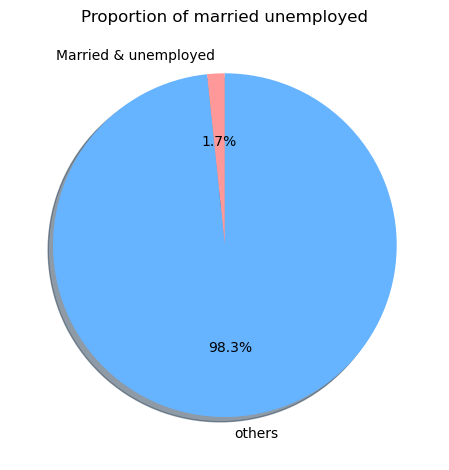

In [30]:
size=count_married_unemploye,df.shape[0]-count_married_unemploye

plt.pie(size,autopct="%1.1f%%",startangle=90,shadow=True,colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],labels=["Married & unemployed","others"])
plt.title("Proportion of married unemployed")
plt.tight_layout()
plt.savefig('Proportion of married unemployed_piechart.png', dpi=300, bbox_inches='tight')
plt.show()

## What is the average age of individuals who subscribed to a term deposit versus those who did not?

In [32]:
df.columns

Index(['Age', 'Job', 'Marital_statuts', 'Education', 'Default', 'Balance',
       'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign',
       'Day_sinces_last_contact', 'Previous', 'Previous_outcome',
       'Customer_subscription'],
      dtype='object')

In [33]:
avg_age_of_sub=df[df["Customer_subscription"]=="yes"]["Age"].mean()
avg_age_of_not_sub=df[df["Customer_subscription"]=="no"]["Age"].mean()


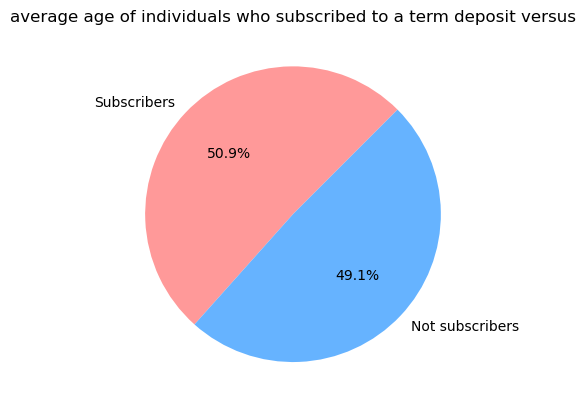

In [34]:
ages=[avg_age_of_sub,avg_age_of_not_sub]
label=["Subscribers","Not subscribers"]
plt.pie(ages,labels=label,startangle=45,colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],autopct="%1.1f%%") 
plt.title("average age of individuals who subscribed to a term deposit versus")
plt.savefig('average age of individuals who subscribed to a term deposit versus_piechart.png', dpi=300,bbox_inches='tight')
plt.show()

## How does the average balance vary across different contact months? . How does the average duration of customer calls vary by month?

In [36]:
df.head(1)

,Age,Job,Marital_statuts,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_sinces_last_contact,Previous,Previous_outcome,Customer_subscription
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no


In [37]:
avg_balance_per_month=df.groupby("Month")["Balance"].mean()
avg_balance_per_month

C:\Users\hkoli\AppData\Local\Temp\ipykernel_15708\1497208741.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_per_month=df.groupby("Month")["Balance"].mean()


Month
apr    1654.243369
aug    1457.211323
dec    3567.150000
feb    1321.461534
jan     985.832118
jul     794.740464
jun    1887.296536
mar    2049.530612
may    1102.989819
nov    2593.759144
oct    2738.650000
sep    1589.346154
Name: Balance, dtype: float64

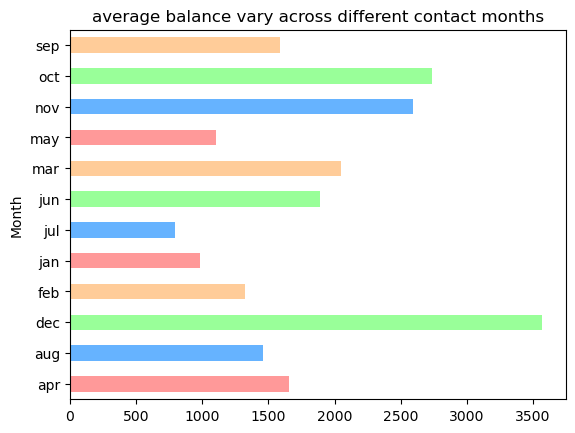

In [38]:
avg_balance_per_month.plot(kind="barh",color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("average balance vary across different contact months")
plt.savefig('average balance vary across different contact months.png', dpi=300,bbox_inches='tight')
plt.show()


## How does the average duration of customer calls vary by month?

In [40]:
df.head(1)

,Age,Job,Marital_statuts,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_sinces_last_contact,Previous,Previous_outcome,Customer_subscription
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no


In [41]:
avg_duration_per_month=df.groupby("Month")["Duration"].mean()
avg_duration_per_month

C:\Users\hkoli\AppData\Local\Temp\ipykernel_15708\4065096044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_per_month=df.groupby("Month")["Duration"].mean()


Month
apr    294.354949
aug    243.742496
dec    416.900000
feb    255.698198
jan    269.540541
jul    271.205382
jun    252.425612
mar    198.897959
may    267.316166
nov    272.066838
oct    272.800000
sep    215.730769
Name: Duration, dtype: float64

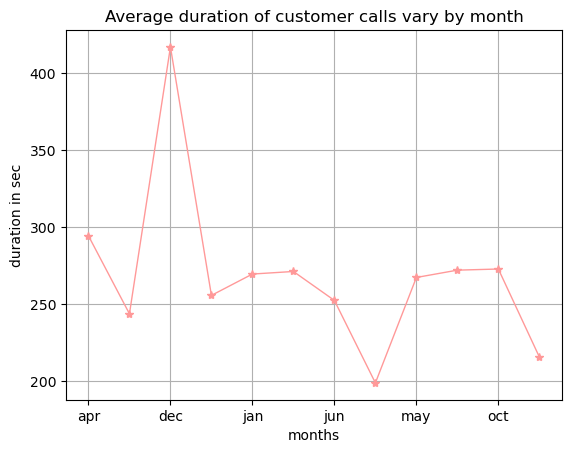

In [42]:
avg_duration_per_month.plot(kind="line",marker="*",linestyle="-",linewidth=1,color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title("Average duration of customer calls vary by month")
plt.ylabel("duration in sec")
plt.xlabel("months")
plt.grid()
plt.savefig('Average duration of customer calls vary by month.png', dpi=300,bbox_inches='tight')
plt.show()

## What is the distribution of marital status (married/single/divorced) across different education levels?

In [44]:
df.head(1)

,Age,Job,Marital_statuts,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_sinces_last_contact,Previous,Previous_outcome,Customer_subscription
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no


In [45]:
marital_status_education=df.groupby(["Education","Marital_statuts"]).size().unstack()
marital_status_education

C:\Users\hkoli\AppData\Local\Temp\ipykernel_15708\417898284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_status_education=df.groupby(["Education","Marital_statuts"]).size().unstack()


Marital_statuts,divorced,married,single
Education,,,
primary,79,526,73
secondary,270,1427,609
tertiary,155,727,468
unknown,24,117,46


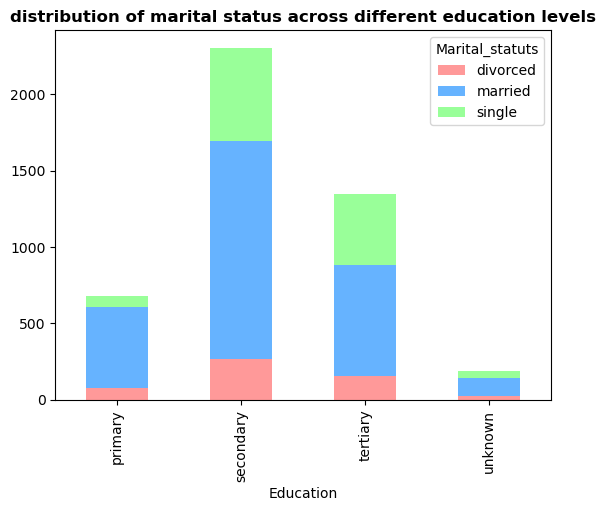

In [46]:
marital_status_education.plot(kind="bar",stacked=True,color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title("distribution of marital status across different education levels",fontweight="bold")
plt.savefig('distribution of marital status across different education levels.png', dpi=300,bbox_inches='tight')
plt.show()


In [47]:
df.head()

,Age,Job,Marital_statuts,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_sinces_last_contact,Previous,Previous_outcome,Customer_subscription
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,1.0,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1.0,-1,0,unknown,no


## how many Marital_statuts gave housing

In [49]:
Marital_statuts_have_house=df.groupby(["Marital_statuts","Housing"]).size().unstack()
Marital_statuts_have_house

C:\Users\hkoli\AppData\Local\Temp\ipykernel_15708\1845806773.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Marital_statuts_have_house=df.groupby(["Marital_statuts","Housing"]).size().unstack()


Housing,no,yes
Marital_statuts,,
divorced,230,298
married,1172,1625
single,560,636


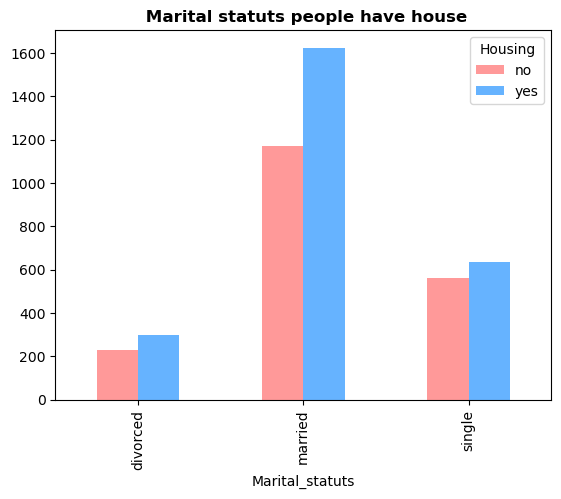

In [50]:
Marital_statuts_have_house.plot(kind="bar",color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.savefig('Marital statuts people have house.png', dpi=300,bbox_inches='tight')
plt.title(" Marital statuts people have house",fontweight="bold")
plt.show()

In [51]:
df

,Age,Job,Marital_statuts,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_sinces_last_contact,Previous,Previous_outcome,Customer_subscription
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,1.0,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1.0,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5.0,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1.0,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11.0,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4.0,211,3,other,no


In [52]:
df["Job"].nunique

<bound method IndexOpsMixin.nunique of 0          unemployed
1            services
2          management
3          management
4         blue-collar
            ...      
4516         services
4517    self-employed
4518       technician
4519      blue-collar
4520     entrepreneur
Name: Job, Length: 4521, dtype: category
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']>